# Quantum teleportation with FockStateCircuit
We show how to use the class 'FockStateCircuit' to simulate quantum teleportation as proposed by Charles Bennet and first experimentally demonstrated by Dirk Bouwmeester and co-workers from the group of Anton Zeilinger in Austria.

## References
C.H. Bennett, G. Brassard, C.  Crépeau, R. Jozsa, A. Peres, Asher and W.K. Wootters, “Teleporting an unknown quantum state via dual classical and Einstein-Podolsky-Rosen channels,” Phys. Rev. Lett. 70, 1895 (1993). https://doi.org/10.1103/PhysRevLett.70.1895

N. Lütkenhaus, J. Calsamiglia and K.-A. Suominen, “Bell measurements for teleportation,” Phys. Rev. A 59, 3295 (1999). https://doi.org/10.1103/PhysRevA.59.3295

M. Michler, K. Mattle, H. Weinfurter and A. Zeilinger, “Interferometric Bell-state analysis,” Phys. Rev. A 53, R1209 (1996). https://doi.org/10.1103/PhysRevA.53.R1209

D. Bouwmeester, J.-W. Pan, K. Mattle, M. Eibl, H. Weinfurter and A. Zeilinger, “Experimental quantum teleportation,“ Nature 390, 575 (1997). https://doi.org/10.1038/37539

## Load the required modules

In [1]:
import sys  
sys.path.append("../src")
import fock_state_circuit as fsc
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

## Quantum teleportation theory
### Quantum Teleportation
Teleportation is about bringing an intact quantum state from one place to the other. Obviously sending a quantum state can be achieved by sending a complete particle that carries the state. Even if the original carrier of the quantum state would not be moveable (i.e., and atom in fixed location) the state could be transferred to a more moveable particle (i.e., a photon) and that photon could be send. The receiver would then again transfer the state from the photon to an atom fixed at receiver's location and we would have achieved bringing the quantum state across. This is a rather trivial way of moving quantum states around. When we speak about teleportation we refer to bringing a quantum state across without an actual particle carrying the state. We can for instance bring across a quantum state via classical communication alone. In that case the sender and receiver could communicate via e-mail, a radio or even an old-fashioned letter and still succeed to move the quantum state. 

In 1993 C.H.Bennet proposed a method to achieve this quantum teleportation via classical communication (see references). The pre-requisite for this scheme is that sender and receiver already shared upfront a pair of entangled particles. These entangled particles can be prepared well before the to-be-teleported quantum state is even created, so it is clear that in this entangled no information about the quantum state can be contained. Once the quantum state is available to the sender some measurements have to be performed, and only limited information on the outcomes of these measurements have to be shared etween sender and receiver in order to enable the receiver to re-create the quantum state.

Some notes on quantum teleportation:

> This is teleportation and not cloning.

In the teleportation process the quantum state at the side of the sender is destroyed. Unlike classical information quantum information cannot be copied. After teleportation (or more exactly, after the measurement which yields the information to send over the classical channels) there is no way in which the sender could retrieve the original quantum state.

> The exact state which is teleported remains unknown.

In the teleportation process sender and receiver do not collect information on the state they are teleporting. They execute a protocol and exchange classical information, but exactly what they are teleporting remains unknown to them.

> Which a few classical bits we can send an 'infinite' amount of information, which we the cannot fully access.

If we would know the original quantum state of the source photon (for instance because we prepared it in a specific way) we could also via classical channels send this information. For a single photon we would need to send two numbers (i.e., angle and ellipticity, or amplitude and phase of the vertical polarization component). These numbers would have to be send in 'infinite' precision to allow the receiver to replicate the state. Interestingly enough the quantum protocol utilizes only two bits of communication between sender and receiver. Unfortunately we cannot retrieve all information in the full quantum state, although we can develop coding schemes for efficient information transfer based on quantum teleportation (as already highlighted by Bennet in his article)

### How does it work?
We follow the proposal created by Bennet in his original article (see references). The sender has a photon from which the quantum state is to be teleported. The state of this photon (we it call photon 1) can be written as:
$$
\begin{array}{lcl}
|\psi_{1}> &=&  \alpha |\leftrightarrow >_{1} + \beta |\updownarrow >_{1} \\
\end{array} 
$$
with $ |\alpha|^2 + |\beta|^2 = 1 $.

Next to the source photon we also have an entangled photon pair, where one photon (let's call it photon 2) is with the sender and the other (photon 3) has been already send to the receiver. The state of this photon pair can be written as:
$$
\begin{array}{lcl}
|\psi_{23}> &=&  \frac{1}{\sqrt{2}} (|\leftrightarrow >_{2} |\updownarrow >_{3} - |\updownarrow >_{2}|\leftrightarrow >_{3}) \\
\end{array} 
$$

The combined state for all three photons can then be written as:

$$
\begin{array}{lcl}
|\psi_{Total}> &=& |\psi_{1}> \otimes |\psi_{23}>\\[3pt]
|\psi_{Total}> &=&  \frac{\alpha}{\sqrt{2}} (|\leftrightarrow >_{1}|\leftrightarrow >_{2} |\updownarrow >_{3} - |\leftrightarrow >_{1}|\updownarrow >_{2}|\leftrightarrow >_{3}) +  \frac{\beta}{\sqrt{2}} (|\updownarrow >_{1}|\leftrightarrow >_{2} |\updownarrow >_{3} - |\updownarrow >_{1}|\updownarrow >_{2}|\leftrightarrow >_{3})
\end{array} 
$$

Now the 'trick' is to rewrite the combined state into a different basis. For photons 1 and 2 we define the basis of Bell states (which serves as a complete basis for the combined state of these two photons). In general the Bell states for a photon 'a' and 'b' is defined as:

$$
\begin{array}{lcl}
|\Psi_{+}>_{ab} & = &  \frac{1}{\sqrt{2}} (|\leftrightarrow >_{a} |\updownarrow >_{b} + |\updownarrow >_{a}|\leftrightarrow >_{b})\\[3pt]
|\Psi_{-}>_{ab} & = &  \frac{1}{\sqrt{2}} (|\leftrightarrow >_{a} |\updownarrow >_{b} - |\updownarrow >_{a}|\leftrightarrow >_{b})\\[3pt]
|\Phi_{+}>_{ab} & = &  \frac{1}{\sqrt{2}} (|\leftrightarrow >_{a} |\leftrightarrow >_{b} + |\updownarrow >_{a}|\updownarrow >_{b})\\[3pt]
|\Phi_{-}>_{ab} & = &  \frac{1}{\sqrt{2}} (|\leftrightarrow >_{a} |\leftrightarrow >_{b} - |\updownarrow >_{a}|\updownarrow >_{b})
\end{array} 
$$

or in reverse direction:

$$
\begin{array}{lcl}
|\leftrightarrow >_{a} |\updownarrow >_{b} & = &  \frac{1}{\sqrt{2}} (|\Psi_{+}>_{ab} + |\Psi_{-}>_{ab})\\[3pt]
|\updownarrow >_{a} |\leftrightarrow >_{b} & = &  \frac{1}{\sqrt{2}} (|\Psi_{+}>_{ab} - |\Psi_{-}>_{ab})\\[3pt]
|\leftrightarrow >_{a} |\leftrightarrow >_{b} & = &  \frac{1}{\sqrt{2}} (|\Phi_{+}>_{ab} + |\Phi_{-}>_{ab})\\[3pt]
|\updownarrow >_{a} |\updownarrow >_{b} & = &  \frac{1}{\sqrt{2}} (|\Phi_{+}>_{ab} - |\Phi_{-}>_{ab})
\end{array} 
$$

With this we can re-write the combined state of our three photons ($|\psi_{Total}$>) as: 
$$
\begin{array}{lcl}
|\psi_{Total}> &=&  \frac{\alpha}{\sqrt{2}} |\leftrightarrow >_{1}|\leftrightarrow >_{2} |\updownarrow >_{3} \\[3pt]
&&-\frac{\alpha}{\sqrt{2}} |\leftrightarrow >_{1}|\updownarrow >_{2}|\leftrightarrow >_{3}) \\[3pt]
&&+\frac{\beta}{\sqrt{2}}  |\updownarrow >_{1}|\leftrightarrow >_{2} |\updownarrow >_{3} \\[3pt]
&&-\frac{\beta}{\sqrt{2}} |\updownarrow >_{1}|\updownarrow >_{2}|\leftrightarrow >_{3} \\
\end{array} 
$$

$$
\begin{array}{lcl}
|\psi_{Total}> &=&  \frac{1}{2} |\Phi_{+}>_{12}(-\beta |\leftrightarrow >_{3} + \alpha |\updownarrow >_{3})\\[3pt]
&& \frac{1}{2} |\Phi_{-}>_{12} (\beta |\leftrightarrow >_{3} + \alpha |\updownarrow >_{3})\\[3pt]
&& -\frac{1}{2} |\Psi_{+}>_{12} (\alpha |\leftrightarrow >_{3} - \beta |\updownarrow >_{3})\\[3pt]
&& -\frac{1}{2} |\Psi_{-}>_{12} (\alpha |\leftrightarrow >_{3} + \beta |\updownarrow >_{3})
\end{array} 
$$

Now if the sender performs a Bell state measurement on photons 1 and 2 the overall state will collapse into the component corresponding to the Bell state that was detected. We cannot predict which state we will detect, but we know that once we detect a Bell state for photons 1 and 2 the total state will collapse. For instance if we detect photons 1 and 2 in state $|\Psi_{-}>_{12}$, we know that the overall state is $|\Psi_{-}>_{12}(\alpha |\leftrightarrow >_{3} + \beta |\updownarrow >_{3})$. As the state for photon 3 can be factored out from this description we know exactly the state of photon 3: $|\psi_{3}> =  \alpha |\leftrightarrow >_{3} + \beta |\updownarrow >_{3}$. So, in the cases where we detect photons 1 and 2 in the state $|\Psi_{-}>_{12}$, we know that photon 3 has exactly the same quantum state as the source photon. Teleportation successful !!

If we detect photons 1 and 2 in another state the situation is slightly more complex. Take for example the case where we detect for photons 1 and 2 the state $|\Phi_{+}>_{12}$. We know that in that case the state for photon 3 can be written as: $|\psi_{3}> =  -\beta |\leftrightarrow >_{3} + \alpha |\updownarrow >_{3}$. This is almost the same as the original state, but not fully. We need to take two actions to bring this state back to the original. Firstly we see the minus sign before the $\beta$. This is something we can easily correct by applying a unitary transformation. In practice this means we have to apply a half-wave plate with fast/slow axis aligned along horizontal/vertical direction. This wave-plate will apply a phase shift of $180^{o}$ to bring the state for photon 3 to the state $|\psi_{3}> =  \beta |\leftrightarrow >_{3} + \alpha |\updownarrow >_{3}$. Now we have to flip the polarization to bring the amplitude $\alpha$ for the horizontal component and $\beta$ for the vertical component. This 'flip' we can perform by a half-wave plate oriented diagonally at $45^{o}$. This will lead to $|\psi_{3}> =  \beta |\updownarrow >_{3} + \alpha |\leftrightarrow >_{3} = \alpha |\leftrightarrow >_{3} + \beta |\updownarrow >_{3}$. So if the sender detects state $|\Phi_{+}>_{12}$ the receiver will have to use to wave-plates to bring the state of photon 3 to the original state of the source photon. With these operations we can conclude: Teleportation successful !!

So, depending on the information received via classical communication the receiver knows what transformation to perform on their photon to bring it into the desired end-state. We can summarize in a table what are the actions that the receiver needs to take, based on information received from the sender. 

Detected by Sender | communicated to Receiver | action taken by receiver
----------------|----------------|----------------
$\Psi_{+}$ | 00 | apply phase shift $180^{o}$ for vertical polarization
$\Psi_{-}$ | 01 | do nothing
$\Phi_{+}$ | 10 | apply phase shift $180^{o}$ for vertical polarization and flip polarization by half wave plate at $45^{o}$ 
$\Phi_{-}$ | 11 | flip polarization by half wave plate at $45^{o}$

After the receiver performed the required action on 'their' photon the procedure is completed and the initial state of the source photon at sender's side has been teleported to the target photon at receiver's side, with only sharing an entangled pair (which does not contain any information on the state) and two classical bits.

So in summary: We start with a 'source' photon in an unknown polarization state and two other photons in a known entangled state. From these two entangled photons one is with the sender ('Alice') and one is with the receiver ('Bob'). We want to teleport the unknown state from the first photon to the photon that is with the receiver. This receiver can be at any distant location. Other than the entangled photon Alice can only share with Bob the outcome of the Bell state measurement (i.e., she can with two bits indicate whether her Bell state measurement resulted in detecting $\Psi_{+},\Psi_{-},\Phi_{+}$ or $\Phi_{-}$). Based in this information received from Alice, Bob is able to bring his photon in the exact state that the original source photon had. In this process the original photon is destroyed (or at least the polarization state is affected such that it cannot be retrieved from that photon. This is teleportation, not cloning). Also, in this process neither Bob or Alice 'know' the state they have been teleporting. They only know that they did teleport the state. In spite of only communicating two bits the quantum state has been teleported exactly, to infinite precision.

### Teleporting an entangled state
Above we show that the method proped by Bennet can teleport any state, i.e., for any $\alpha$ and $\beta$ we can bring the state from source photon to a target photon. But what would happen if the source photon was part of another pair of entangled photons? Would teleportation also transfer the entanglement and would the target photon ultimately be part of an entangled pair?

Let's add a 'photon 0' to the analysis, which is entangled with our source photon.
$$
\begin{array}{lcl}
|\psi_{01}> &=& \frac{1}{\sqrt{2}} (|\leftrightarrow >_{0}|\leftrightarrow >_{1} + |\updownarrow >_{0}|\updownarrow >_{1}) \\
\end{array} 
$$

We still have another entangled pair shared between sender and receiver.
$$
\begin{array}{lcl}
|\psi_{23}> &=&  \frac{1}{\sqrt{2}} (|\leftrightarrow >_{2} |\updownarrow >_{3} - |\updownarrow >_{2}|\leftrightarrow >_{3}) \\
\end{array} 
$$

The total wavefunction is therefore:
$$
\begin{array}{lcl}
|\psi_{Total}> &=& |\psi_{01}> \otimes |\psi_{23}>\\[3pt]
|\psi_{Total}> &=&  +\frac{1}{2} |\leftrightarrow >_{0}|\leftrightarrow >_{1}|\leftrightarrow >_{2} |\updownarrow >_{3}\\[3pt]
                              &&  -\frac{1}{2}|\leftrightarrow >_{0}|\leftrightarrow >_{1}|\updownarrow >_{2}|\leftrightarrow >_{3}\\[3pt]
                              &&  +\frac{1}{2}|\updownarrow >_{0}|\updownarrow >_{1}|\leftrightarrow >_{2} |\updownarrow >_{3}\\[3pt]
                              &&  -\frac{1}{2}|\updownarrow >_{0}|\updownarrow >_{1}|\updownarrow >_{2}|\leftrightarrow >_{3}
)
\end{array} 
$$

We then perform a Bell state measurement on photons 1 and 2. Just as we did above we can rewrite the state in the Bell state basis for these photons.
$$
\begin{array}{lcl}
|\psi_{Total}> &=& |\psi_{01}> \otimes |\psi_{23}>\\[3pt]
|\psi_{Total}> &=&  +\frac{1}{2\sqrt{2}} |\leftrightarrow >_{0} (|\Phi_{+}>_{12} + |\Phi_{-}>_{12}) |\updownarrow >_{3}\\[3pt]
                              &&  -\frac{1}{2\sqrt{2}}|\updownarrow >_{0}(|\Phi_{+}>_{12} - |\Phi_{-}>_{12})|\leftrightarrow >_{3}\\[3pt]
                              &&  -\frac{1}{2\sqrt{2}}|\leftrightarrow >_{0}(|\Psi_{+}>_{12} + |\Psi_{-}>_{12}) |\leftrightarrow >_{3}\\[3pt]
                              &&  +\frac{1}{2\sqrt{2}}|\updownarrow >_{0}(|\Psi_{+}>_{12} - |\Psi_{-}>_{12})|\updownarrow >_{3}\\[3pt]
|\psi_{Total}> &=&  +\frac{1}{2\sqrt{2}}|\Phi_{+}>_{12}(|\leftrightarrow >_{0}|\updownarrow >_{3} - \updownarrow >_{0}|\leftrightarrow >_{3})\\[3pt]
                              &&  +\frac{1}{2\sqrt{2}}|\Phi_{-}>_{12}(|\leftrightarrow >_{0}|\updownarrow >_{3} + \updownarrow >_{0}|\leftrightarrow >_{3})\\[3pt]
                              &&  -\frac{1}{2\sqrt{2}}|\Psi_{+}>_{12}(|\leftrightarrow >_{0}|\leftrightarrow >_{3} - \updownarrow >_{0}|\updownarrow >_{3})\\[3pt]
                              &&  -\frac{1}{2\sqrt{2}}|\Psi_{-}>_{12}(|\leftrightarrow >_{0}|\leftrightarrow >_{3} + \updownarrow >_{0}|\updownarrow >_{3})\\[3pt]
\end{array} 
$$

So, if we detect photons 1 and 2 in Bell state $|\Psi_{-}>_{12}$ we know that photons 0 and 3 are in the state $\frac{1}{\sqrt{2}}|\leftrightarrow >_{0}|\leftrightarrow >_{3} + \updownarrow >_{0}|\updownarrow >_{3}$, which is the same state are the original entanglement between photons 0 and 1. If we detect photons 1 and 2 in Bell state $|\Phi_{+}>_{12}$ we can apply a $180^{o}$ between horizontal and vertical polarization components of photon 3 and we have to flip the polarization of photon 3 between horizontal and vertical. So effectively, we conclude that the same actions by the receiver which we specified above for 'regular' teleportation would also work to teleport an entangled state. Entanglement is maintained by teleporting a quantum state, and if a particles would be entangled with the source photon before teleportation, then after teleportation that particle is entangled in the same way with the target photon. And all that by sharing 2 bits of classical communication!

### Limitations due to Bell state measurement
There is one caveat to the above. As we have seen teleportation requires us to project two photons on a Bell state. Unfortunately for photons perfect Bell state detection is not possible with optical components like beamsplitters and wave plates. This is noticed by N. Lütkenhaus in his 1999 paper (see references).

![title](../images/Lutkenhaus1999_summary.png)

For teleportation we have to perform a Bell state measurement and based on which of the 4 states we detect we communicate different 'instructions' to the receiver. If we cannot measure all Bell states it means that for some runs we cannot give the right instructions to the receiver, and teleportation will fail. So the limitation on Bell state detection does not mean we cannot teleport. It does mean that teleportation will not be successful in 100% of the attempts. Luckily the sender will know when there was a failure in the Bell state detection so the attempt can be repeated. There is no guesswork.

Bouwmeester already noted this in his article, where is also mentioned that the reduced success rate does not mean teleportation cannot be achieved. In fact, in the Bouwmeester experiment only one Bell state could be detected so teleportation was only successful in 25% of the cases.

![title](../images/Bouwmeester1999-quote1.png)

The limit for Bell state detection with linear optical elements is 50% (i.e., we can identify 2 from the 4 Bell states). In the remainder of this post and also in the simulation we present below we use a setup where two Bell states can be detected and the maximum successrate for Bell state detection is 50%. The approach take for Bell state detection is described in the publication from M. Michler in 1997 (see references). We use 4 detectors to uniquely identify the states $\Psi_{+}$ and $\Psi_{-}$. We also detect that the photons are in state $\Phi_{+}$ or $\Phi_{-}$, but in that case cannot uniquely identify in which of these two Bell states we find the photons


## Bell state detection
Before writing code for the complete teleportation process let's look at how we can detect Bell states. This is the key step in teleportation and understanding how it is done (and what states we can actually detect) is needed to understand the complete process.

We look at a circuit with 2 photons. For each photon we need a channel for horizontal and for vertical polarization. So we need 4 optical channels in total. We will detect the presence of a photon in each of these channels, so we have 4 detectors and need 4 classical channels to log the outcome of the measurement. As we have 2 photons the maximum number of photons in one channel would be 2. So each channel has either 0,1 or 2 photons making the paramater `length_of_fock_state` equal to 3. 

Once we initialized the circuit we only need a non-polarizing beamsplitter and a detector per channel.

In [2]:
# create a FockStateCircuit to detect Bell states
bell_detection_circuit = fsc.FockStateCircuit(length_of_fock_state = 3, 
                                no_of_optical_channels = 4,
                                no_of_classical_channels=4
                                )
bell_detection_circuit.non_polarizing_50_50_beamsplitter( input_channels_a = (0,1),
                                                          input_channels_b = (2,3))
bell_detection_circuit.measure_optical_to_classical(optical_channels_to_be_measured=[0,1,2,3],
                                                    classical_channels_to_be_written=[0,1,2,3]
                                                    )

Next we prepare as input state the 4 Bell states and run them through the system. If we plot the results in the classical channels we see that we can identify the states $\Psi_{+}$ and $\Psi_{-}$, but that for states $\Phi_{+}$ and $\Phi_{-}$ we get the same readings from the detectors. So we can only perform successful teleportation in 50% of the runs (the runs in which we find the Bell state $\Psi_{+}$ or $\Psi_{-}$)

In [3]:
# prepare the 4 Bell states as input for the circuit
initial_collection_of_states = fsc.CollectionOfStates(fock_state_circuit=bell_detection_circuit)

amp = 1/math.sqrt(2)
state_psi_plus = initial_collection_of_states.get_state(initial_state='0000').copy()
state_psi_plus.initial_state = 'state_psi_plus'
state_psi_plus.optical_components = { '1001' :  {'amplitude': amp, 'probability': amp**2},
                                      '0110' : {'amplitude': amp, 'probability': amp**2}
                                      }

state_psi_minus = initial_collection_of_states.get_state(initial_state='0001').copy()
state_psi_minus.initial_state = 'state_psi_minus'
state_psi_minus.optical_components = { '1001' :  {'amplitude': amp, 'probability': amp**2}, 
                                        '0110' : {'amplitude': -1*amp, 'probability': amp**2}
                                        }

state_phi_plus = initial_collection_of_states.get_state(initial_state='0010').copy()
state_phi_plus.initial_state = 'state_phi_plus'
state_phi_plus.optical_components = {'1010' :  {'amplitude': amp, 'probability': amp**2}, 
                                     '0101' : {'amplitude': amp, 'probability': amp**2}
                                     }

state_phi_minus = initial_collection_of_states.get_state(initial_state='0011').copy()
state_phi_minus.initial_state = 'state_phi_minus'
state_phi_minus.optical_components = {'1010' :  {'amplitude': amp, 'probability': amp**2}, 
                                      '0101' : {'amplitude': -1*amp, 'probability': amp**2}
                                      }

initial_collection_of_states.clear()
initial_collection_of_states.add_state(state_psi_plus)
initial_collection_of_states.add_state(state_psi_minus)
initial_collection_of_states.add_state(state_phi_plus)
initial_collection_of_states.add_state(state_phi_minus)

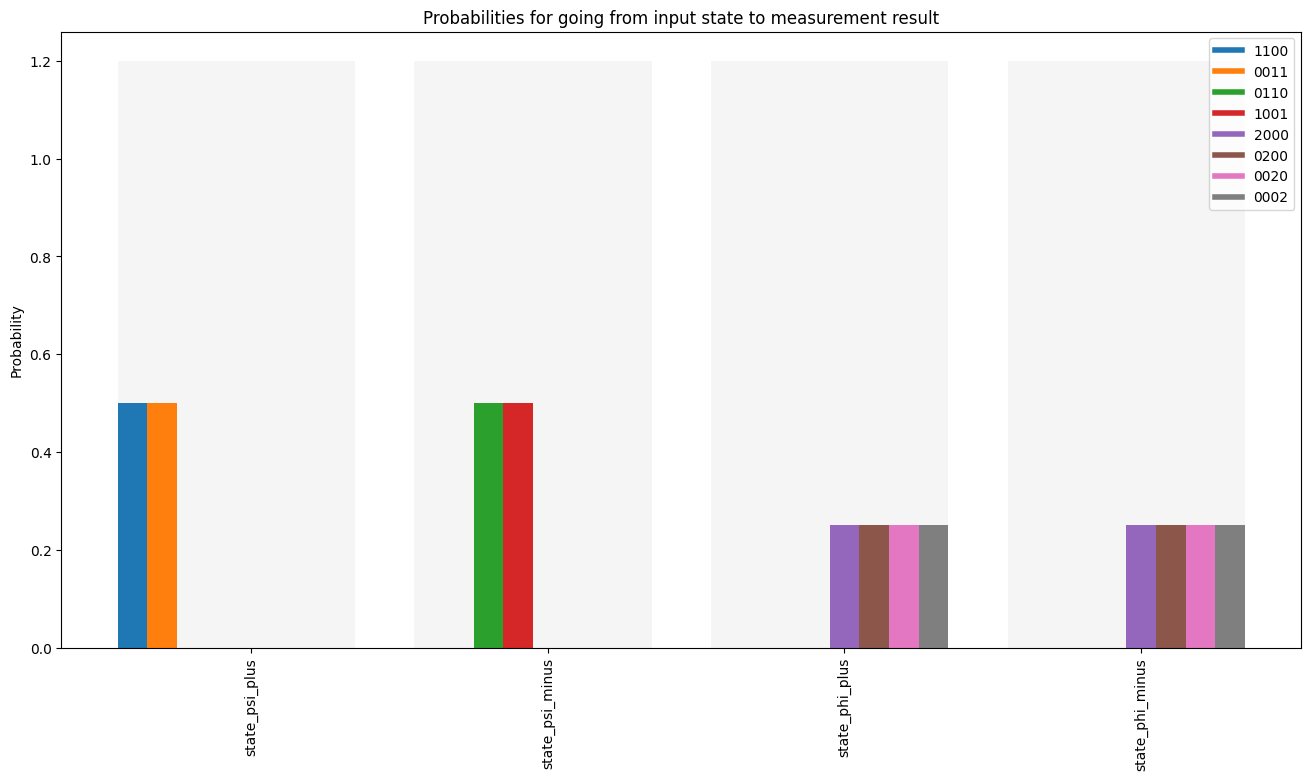

In [4]:
result = bell_detection_circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)
result.plot(classical_channels=[0,1,2,3])


### Quantum teleportation with FockStateCircuit
Next we will demonstrate teleportation using Python's FockStateCircuit. This class is specifically developed to simulate (quantum) optical circuits like the ones used in the Bouwmeester teleportation experiment. See https://armchairquantumphysicist.com/2023/06/30/building-quantum-optical-systems-in-python/ or https://github.com/robhendrik/FockStateCircuit. We will demonstrate the basic experiment as carried out by Bouwmeester as well as a more extended experiment where the teleport an entangled state. 

A 'FockStateCircuit' consists of optical channels that carry the photons and classical channels that can be used to store measurement results, define the settings of optical components (e.g., the orientation angle of a phase plate) or can be used as communication channels between senders and receivers. Before setting up the circuit let's define how many channels we need and what the role of each channel would be.

For teleportation we need minimally three photons with any possible polarization state: a 'source' photon and an entangled pair from which one is at sender and one at receiver. If we want to show that entanglement is maintained in the teleportation we would need a extra photon at side of the sender to be initially entangled with the 'source' photon. In FockStateCircuit we therefore need 8 optical channels (2 polarizations x 4 photons). The first two channels contain the horizontal and vertical polarization of the photon that is entangled with the 'source', the second two channels (channel 2 and 3) contain the 'source' photon. This is the photon whose state we want to teleport to the receiver. Channels 4 and 5 then contain the photon of the shared entangled pair at sender's side and channels 6 and 7 the photon of the shared pair at receiver's side. The latter photon is the 'target' to which we want to teleport the quantum state.

To demonstrate successful teleportation we will measure the target photon at receiver side for both polarization directions. If we want to check that entanglement is maintained we will also measure the photon that was originally entangled with the source photon (also in two polarization directions). We can define 4 classical channels to store these measurement results. Then, to perform the teleportation the sender will have to detect detect a Bell state for which we use 4 detectors and need 4 classical channels to log the results. Then additionally we use two classical communication channels between sender and receiver to communicate the two bits. With this we already have 10 classical channels in the circuit.

Once the communication is received by receiver they will need to set waveplates to apply the $180^{o}$ and the polarization flip between horizontal and vertical orientation. To set the optical components the receiver will use two classical channels that control the wave plates in the circuit.

Then, we want to show that teleportation works for any random state. To show this we want to prepare the 'source' photon in a few different states and demonstrate that each state is teleported correctly. In the simulation we will start with the source photon horizontally polarized. We then as very first step apply a wave plate with 'random' orientation and 'random' phase delay to bring the photon to a 'random' state. This is the state we teleport. To show succes we apply the reverse operation on the target photon at the very end. We take the same wave plate orientation, but invert the phase delay. If indeed the target photon has the 'random' state that was given to the source this reverse operation should bring the target photon to horizontal polarization. So if we measure we should always detect the target photon in horizontal polarization and never in vertical polarization. To store the orientation and phase delay of this wave plate we use two auxiliary channels. 

In total we will use 8 optical channels and 14 classical channels in our circuit.

Let's summarize the role of the different channels

Channel | role
-------------|----------------------------
Optical channel 0-1 | Horizontal/vertical polarization optional photon that can be entangled with source photon
Optical channel 2-3 | Horizontal/vertical polarization 'source' photon at sender
Optical channel 4-5 | Horizontal/Vertical polarization 1st photon of shared entangled pair at sender
Optical channel 6-7 | Horizontal/Vertical polarization 'target' photon (2nd photon of shared entangled pair) at receiver
Classical channels 0-1 | Store measurement by sender on the photon that is entangled with the source photon
Classical channels 2-5 | Store Bell state measurement by sender
Classical channels 6-7 | Communicate two bits from sender to receiver
Classical channels 8-9 | Auxiliary channel used by receiver to set the desired action on the target photon
Classical channels 10-11 | Final measurement on target bit to check whether teleportation was successful
Classical channels 12-13 | Auxiliary channel used in to prepare the source photon in a 'random' state

We know we can only detect the states $\Psi_{+}$ and $\Psi_{-}$. The two-bit classical communication for these Bell states wil be '00' and '01' in channels 6 and 7. If the sender was not successful in detecting a Bell state they can set the two bits to '11'. In that we way the receiver knows that if channel 6 contains a '1' the run can be discarded, and of channel 6 contains a '0' the state of the target photon can be adjusted based on the value of channel 7. So in our simulation we can discard all runs that have a '1' in classical channel and only include the runs where we manage to detect a Bell state have value '0' in channel 6.

If we do not start out with an entangled source photon we have to check whether after teleportation the target photon is in the same quantum state as originally the source photon was. We do this by reversing the steps taken to prepare the source photon (as described above). After this reversal the target photon should be horizontally polarized. We write the result of detection of the target photon to channels 10 and 11. So if successful we expect channel 10 to be a '1' and channel 11 to be a '0'. 

If we start with an entangled source photon we do not have a definite polarization for the target photon. Channels 10 and 11 could be '01' or '10'. However, since we also detect the photon that was entangled with the soure and now is entangled with the target we should see that the polarizations correlate. In our simulation the two photons are entangled to always have the same polarization ($\frac{1}{\sqrt{2}} (|\leftrightarrow >_{0}|\leftrightarrow >_{1} + |\updownarrow >_{0}|\updownarrow >_{1})$). The measurement results for the entangled photon are written to channels 0 and 1. So when teleportation is successfull we should detect the same outcome (either '10' or '01') for channels 0, 1 and channels 10, 11. 

Before we go to the code let's look at how we deal with the quantum state of the photons in the simulation. The photon state is represented by a string of 8 integers. Each integer represents the photon state in one channel. For each photon we have a pair of channels where the first represents horizontal polarization and the second vertical polarization. Some examples of this notation

> A single horizontally photon as source

If there would be a single photon in the channels of the source photon the state would be '00100000'. In our ket notation this would be $|\leftrightarrow>_{1} $

> An entangled state for the shared photon pair $\frac{1}{\sqrt{2}} (|\leftrightarrow >_{2} |\updownarrow >_{3} - |\updownarrow >_{2}|\leftrightarrow >_{3})$

The entangled photon pair would be represented as a superposition of '00001001' with amplitude $\frac{1}{\sqrt{2}}$ and '00000110' with amplitude $\frac{-1}{\sqrt{2}}$.

> Two entangled photon pairs $\frac{1}{\sqrt{2}} (|\leftrightarrow >_{0}|\leftrightarrow >_{1} + |\updownarrow >_{0}|\updownarrow >_{1}) \otimes \frac{1}{\sqrt{2}} (|\leftrightarrow >_{2} |\updownarrow >_{3} - |\updownarrow >_{2}|\leftrightarrow >_{3})$

If we have an entangled pair with the source photon and the entangled pair shared between sender and receiver the state would be represented as a superposition of '10101001' with amplitude $\frac{1}{2}$,  '01011001' with amplitude $\frac{1}{2}$, '10100110' with amplitude $\frac{-1}{2}$ and '01010110' with amplitude $\frac{-1}{2}$.


### Coding the circuit in FockStateCircuit

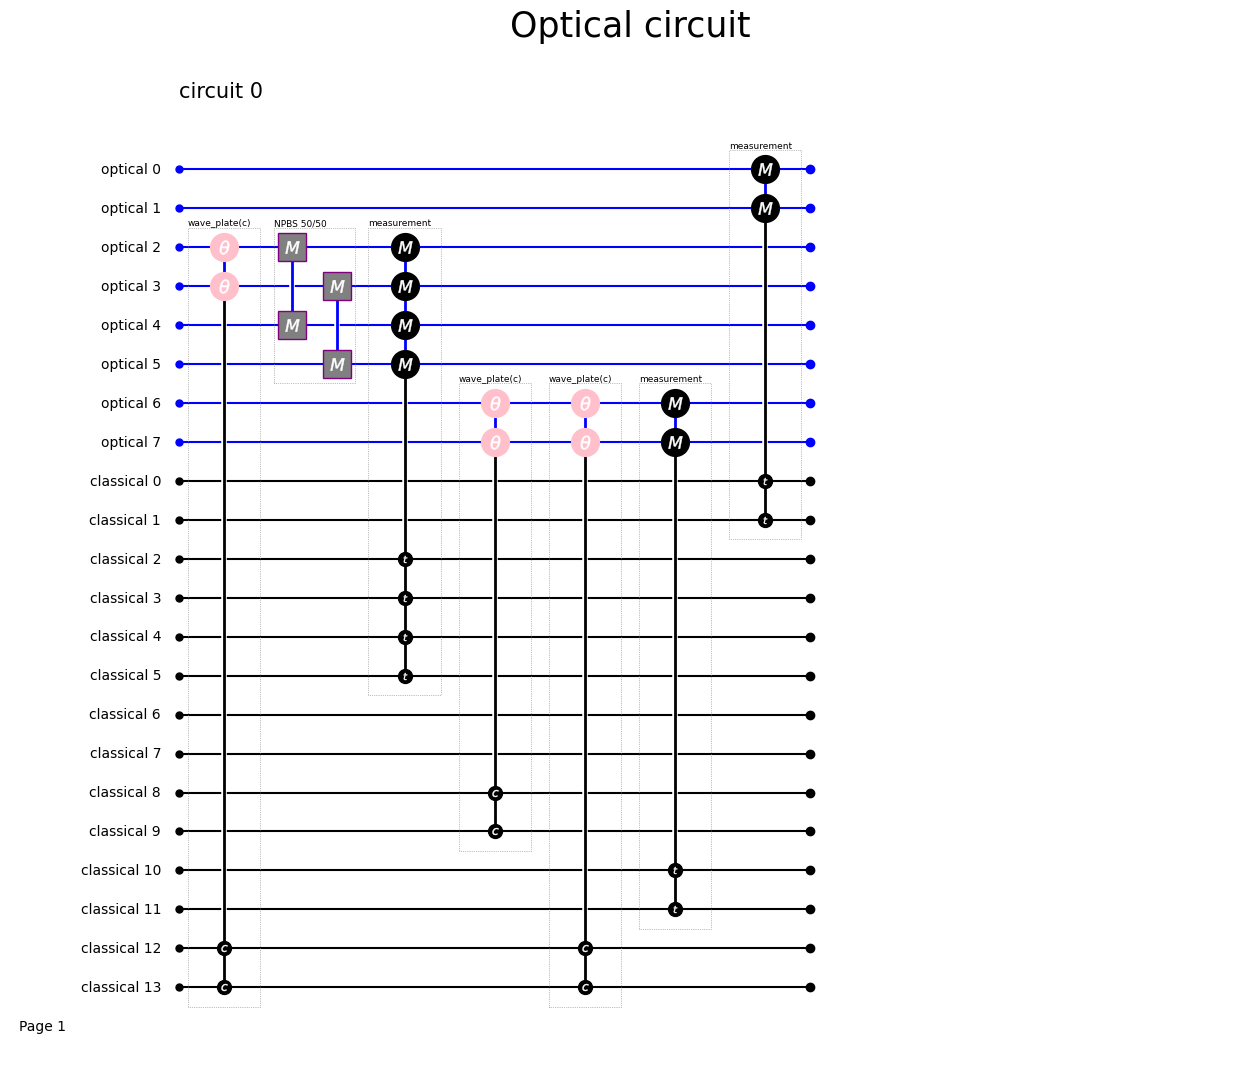

In [5]:
# initialize the circuit 
teleportation_circuit = fsc.FockStateCircuit(   length_of_fock_state = 3, 
                                                no_of_optical_channels = 8,
                                                no_of_classical_channels=14
                                                )

# prepare the source photon (channels 2-3) based on values in auxiliary channels 12 and 13
teleportation_circuit.wave_plate_classical_control( optical_channel_horizontal = 2,
                                                    optical_channel_vertical = 3,
                                                    classical_channel_for_orientation = 12,
                                                    classical_channel_for_phase_shift = 13
                                                    )

# ========= Starting the teleportation =================

# Bell state measurement by sender on source photon and first photon of shared pair
# write the result to classical channels 2-5
teleportation_circuit.non_polarizing_50_50_beamsplitter(input_channels_a = (2,3), 
                                                        input_channels_b = (4,5)
                                                        )
teleportation_circuit.measure_optical_to_classical( optical_channels_to_be_measured=[2,3,4,5],
                                                    classical_channels_to_be_written=[2,3,4,5]
                                                    )

# define communication in channels 6 and 7 to receiver based on outcome of Bell State measurement
def define_communication_bits(input_list, new_values = [], affected_channels = []):
    # if a Bell state is detected the two bits are 0-0 or 0-1
    lookup_table = {(1,1,0,0) : (0,0),
                    (0,0,1,1) : (0,0),
                    (0,1,1,0) : (0,1),
                    (1,0,0,1) : (0,1)
                    }
    
    # default value for the two bits is 1-1
    communication = lookup_table.get(tuple(input_list[2:6]),(1,1))
    
    input_list[6], input_list[7] = communication[0], communication[1]
    return input_list

teleportation_circuit.classical_channel_function(define_communication_bits)

# at receiver side, read the communication in channels 6 and 7 and 
# decide how to oriented the wave plates for retrieving the desired quantum state
def determine_wave_plate_settings(input_list, new_values = [], affected_channels = []):
    # if the communication is 0-0 apply a phase shift. if it is 0-0 do nothing.
    lookup_table = {(0,0) : (0,math.pi), (0,1) : (0,0)}
    bell_result = tuple(input_list[7:9])
    communication = lookup_table.get(bell_result,(0,0))
    input_list[8], input_list[9] = communication[0], communication[1]
    return input_list

teleportation_circuit.classical_channel_function(determine_wave_plate_settings)

teleportation_circuit.wave_plate_classical_control( optical_channel_horizontal = 6,
                                                    optical_channel_vertical = 7,
                                                    classical_channel_for_orientation = 8,
                                                    classical_channel_for_phase_shift = 9
                                                    )

# ========= Teleportation complete ================= 

# reverse the operation on the source photon, but now for the target photon
def reverse_angles(input_list, new_values = [], affected_channels = []):
    input_list[12], input_list[13] = input_list[12], -1*input_list[13]
    return input_list
teleportation_circuit.classical_channel_function(reverse_angles)  

teleportation_circuit.wave_plate_classical_control( optical_channel_horizontal = 6,
                                                    optical_channel_vertical = 7,
                                                    classical_channel_for_orientation = 12,
                                                    classical_channel_for_phase_shift = 13)

# perform a measurement on the target photon in optical channel 6 and 7 
teleportation_circuit.measure_optical_to_classical( optical_channels_to_be_measured=[6,7],
                                                    classical_channels_to_be_written=[10,11])

# finally the sender can measure the photon that was originally entangled with the source
teleportation_circuit.measure_optical_to_classical( optical_channels_to_be_measured=[0,1],
                                                    classical_channels_to_be_written=[0,1])

teleportation_circuit.draw()

### Preparing the input states for the FockStateCircuit
We prepare a `collection_of_states` for the circuit. Each state in the collection has the same optical components and only differs in the auxiliary classical channels 12 and 13. These control how the source photon is prepared prior to teleportation. 

The optical components are prepared in a superposition of '00101001' and '00100110' to reflect source photon in horizontal polarization and the shared pair in an entangled state.

In [6]:
# a list of random settings for the source photon, to show teleportation works for any state
list_of_source_photons = [(math.pi,math.pi), 
                          (math.pi/2,-1*math.pi/3), 
                          (-1*math.pi/4,math.pi/4), 
                          ((3/7)*math.pi,(1/7)*math.pi), 
                          (0,0)
                          ]


initial_collection_of_states = fsc.CollectionOfStates(fock_state_circuit=teleportation_circuit)
state_default = initial_collection_of_states.get_state(initial_state='00000000').copy()
initial_collection_of_states.clear()

# create collection of states with one state per setting for the source photon
for index, setting in enumerate(list_of_source_photons):      
    amp = 1/math.sqrt(2)
    state = state_default.copy()
    state.initial_state = 'state_0' + str(index)
    state.optical_components = {'00101001' :  {'amplitude': amp, 'probability': amp**2}, 
                                '00100110' : {'amplitude': -1*amp, 'probability': amp**2}}
    state.classical_channel_values = [0]*12 + [setting[0]] + [setting[1]]
    initial_collection_of_states.add_state(state)


### Run the FockStateCircuit for the defined input states
We run the `teleportation_circuit` with the prepared `collection_of_states`. In the result we should see that the target photon is always horizontally polarized, so for channels 10 and 11 we should see the values 1 and 0.

In the plot below we see that indeed we only get the outcome '10' indicating a horizontally polarized target photon. The occurence of this outcome is 50% due to the fact that only in 50% of the runs the teleportation is successful due to inherent limitation in our ability to detect Bell states.

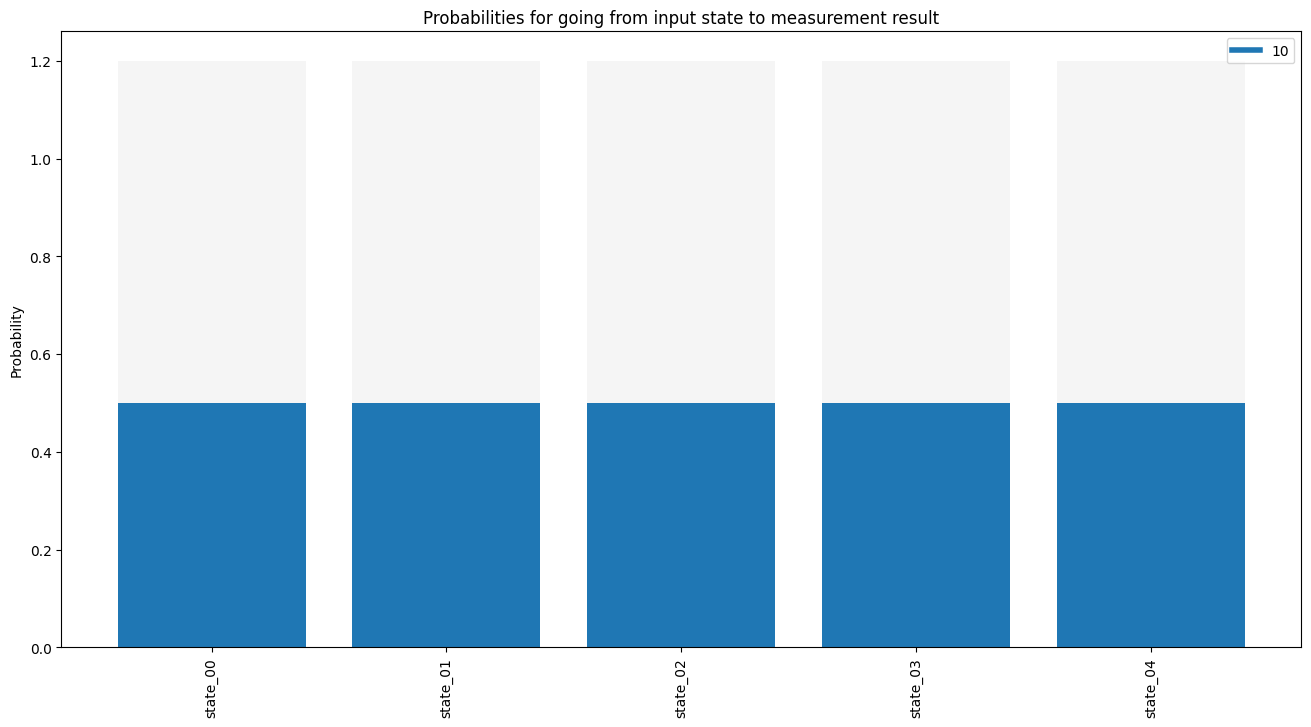

In [7]:
result = teleportation_circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)

# filter on the outcomes where classical channel 6 is '0'. Only in these case a Bell state has been detected
result.filter_on_classical_channel(classical_channel_numbers=[6], values_to_filter=[0])

# plot the result for channels 10-11 where measurement of the target
result.plot(classical_channels=[10,11])

### Preparing the input states with the source photon as part of an entangled pair
We prepare a new `collection_of_states` for the circuit. This time the source photon is entangled with a photon in channels 0 and 1. We also still have the entangled pair that is shared between sender and receiver. 

As result we expect that the entanglement is transferred from source to target photon. So in the end there should be perfect polarization correlation between the photon that was originally entangled with the source, and the target photon. 

Indeed we see in the bar plot below that these two photons are either both horizontally or both vertically polarized. The situation where they have opposite polarization does not occur. We know that only in 50% of the runs the teleportation works, and when it works we have 50%-50% change to find both horizontally or both vertically polarized. So as we see in the bar plot the occurence of any outcome is 25%.

In [8]:
list_of_source_photons = [(math.pi,math.pi), 
                          (math.pi/2,-1*math.pi/3), 
                          (-1*math.pi/4,math.pi/4), 
                          ((3/7)*math.pi,(1/7)*math.pi), 
                          (0,0)
                          ]

initial_collection_of_states = fsc.CollectionOfStates(fock_state_circuit=teleportation_circuit)
state_default = initial_collection_of_states.get_state(initial_state='00000000').copy()
initial_collection_of_states.clear()

for index, setting in enumerate(list_of_source_photons):      
    amp = 1/2
    state = state_default.copy()
    state.initial_state = 'state_0' + str(index)
    state.optical_components = {'10101001' :  {'amplitude': amp, 'probability': amp**2},
                                '10100110' : {'amplitude': -1*amp, 'probability': amp**2},
                                '01011001' : {'amplitude': amp, 'probability': amp**2},
                                '01010110' : {'amplitude': -1*amp, 'probability': amp**2}}
    state.classical_channel_values = [0]*12 + [setting[0]] + [setting[1]]
    initial_collection_of_states.add_state(state)

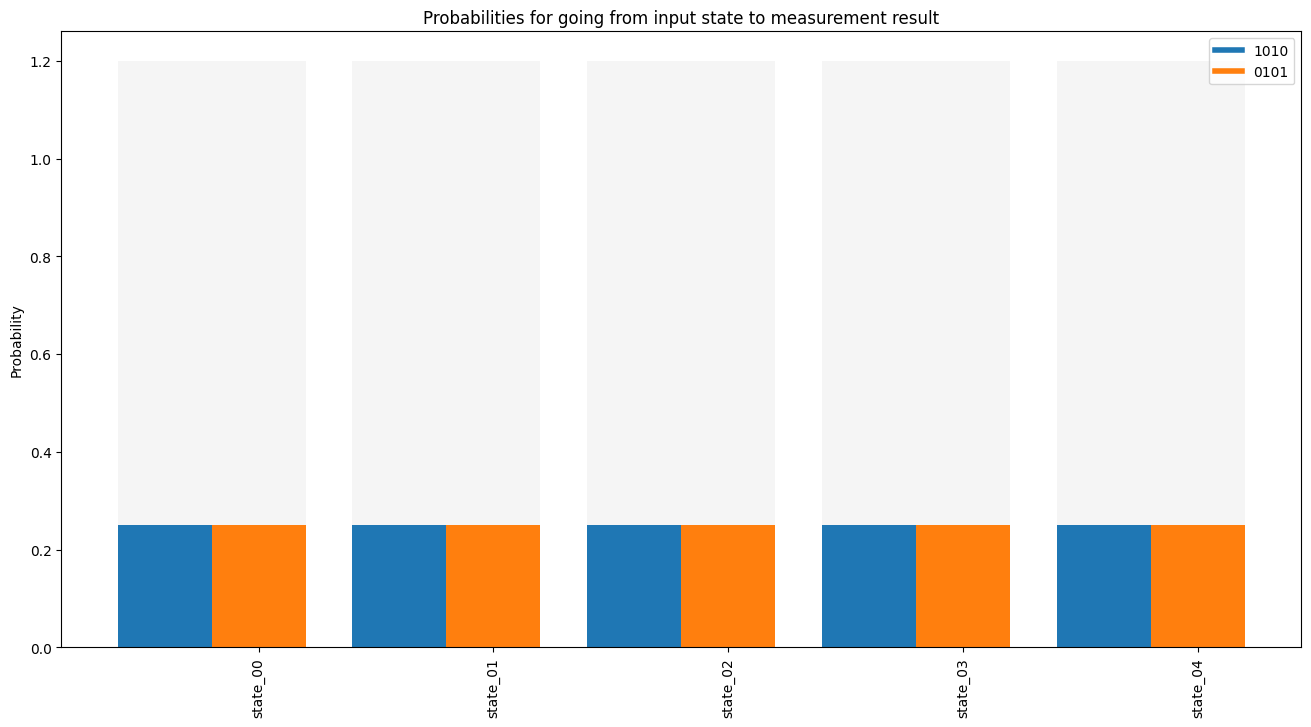

In [9]:
result = teleportation_circuit.evaluate_circuit(collection_of_states_input=initial_collection_of_states)
result.filter_on_classical_channel(classical_channel_numbers=[6], values_to_filter=[0])
result.plot(classical_channels=[0,1,10,11])

In [10]:
fsc.about()


FockStateCircuit: Quantum Optics with Fock States for Python
Copyright (c) 2023 and later.
Rob Hendriks

FockStateCircuit:            1.0.0
CollectionOfStates:          1.0.0
State:                       1.0.0
ColumnOfStates:              1.0.0
InterferenceGroup:           1.0.0
CollectionOfStateColumns:    1.0.0
OpticalNodes:                1.0.0
BridgeNodes:                 1.0.0
CustomNodes:                 1.0.0
ControlledNodes:             1.0.0
MeasurementNodes:            1.0.0
ClassicalNodes:              1.0.0
SpectralNodes:               1.0.0
temporal_functions:          1.0.0
Numpy Version:               1.26.2
Matplotlib version:          3.8.2


# Change history
* Inital version November 2023
* Update April 2024 to adjust to FockStateCircuit vs 1.0.0
    -   Remove `import collection of states as cos`
    -   Replace `fsc.CollectionOfStates` and `fsc.State` by `fsc.CollectionOfStates` and `fsc.State`